In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [834]:
employee = pd.read_csv('data/train-employees.csv')
employee.head(20)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,9/29/2003,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,11/10/2003,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
7,355,192,Josh Roob,Mr,Male,1,Married,126,2/16/2004,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Project Coordinator,1981
8,356,283,Ernest Upton,Ms,Female,1,Single,23,6/1/2005,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,7/1/2006,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967


In [835]:
employee.isna().sum()

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64

<Axes: >

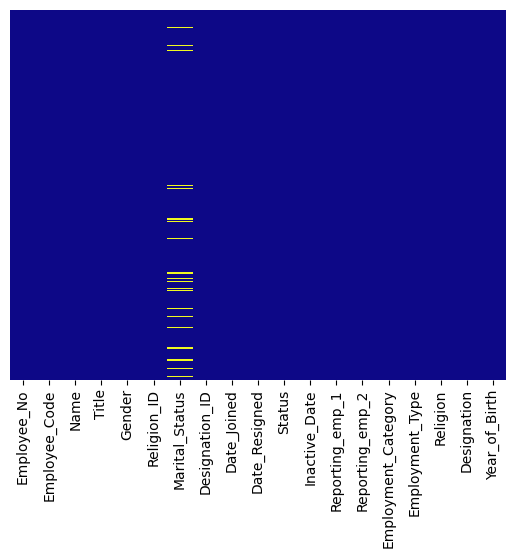

In [836]:
sns.heatmap(employee.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [837]:
# If the name includes Mrs Change title to Mrs, Change gender to Female & change marital_status to Married
employee.loc[employee['Name'].str.contains('Mrs '), ['Title', 'Gender','Marital_Status']] = ['Mrs', 'Female','Married']

In [838]:
# If the name includes Mr, change title to Mr, Chnage gender to Male
employee.loc[employee['Name'].str.contains('Mr '), ['Title', 'Gender']] = ['Mr', 'Male']

In [839]:
employee[employee['Name'].str.contains('Ms ')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
49,419,2421,Ms Jany Lemke,Mr,Male,1,Married,22,8/24/2015,5/31/2021,Inactive,5/31/2021,\N,\N,Staff,Contarct Basis,Buddhist,Technical Officer,1988
71,451,2954,Ms Evelyn Farrell IV,Mr,Male,1,Single,22,3/1/2017,\N,Inactive,2/29/2020,\N,\N,Management,Contarct Basis,Buddhist,Technical Officer,1985
156,609,4933,Ms Wilma Lowe,Ms,Female,1,Married,84,12/26/2019,\N,Inactive,7/31/2020,\N,\N,Staff,Contarct Basis,Buddhist,HR Executive,1986
284,776,75008,Ms Trisha Barrows DVM,Mr,Male,1,Single,55,10/28/2019,12/12/2020,Inactive,12/12/2020,\N,\N,Labour,Contarct Basis,Buddhist,Fitter,1997
365,902,5071,Ms Elta Hoeger III,Mr,Male,1,Married,31,2/19/2020,3/30/2022,Inactive,3/30/2022,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1989
373,923,1885,Ms Margarita Vandervort IV,Mr,Male,1,Married,7,2/20/2014,8/31/2021,Inactive,8/31/2021,\N,\N,Staff,Contarct Basis,Buddhist,Store Keeper,1970
423,1002,5038,Ms Amanda Yost,Mr,Male,1,Married,1,1/16/2020,3/29/2021,Inactive,3/29/2021,\N,\N,Labour,Contarct Basis,Buddhist,Skilled Labor,1988
463,1076,194005,Ms Adell Watsica,Mr,Male,3,Married,31,2/19/2020,0000-00-00,Inactive,3/17/2020,\N,\N,Labour,Contarct Basis,Hindu,Unskilled Labor,1983
508,1215,5006,Ms Lavonne Auer I,Ms,Female,1,Married,17,7/23/2020,\N,Inactive,11/2/2020,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1989
574,1738,198100,Ms Eugenia Yost V,Mr,Male,1,Married,1,4/24/2021,10/31/2021,Inactive,10/31/2021,\N,\N,Labour,Contarct Basis,Buddhist,Skilled Labor,1964


In [840]:
# If name contains Ms, Change gender to Female and title to Ms
employee.loc[employee['Name'].str.contains('Ms '), ['Title','Gender']] = ['Ms','Female']

In [841]:
employee[employee['Name'].str.contains('Miss ')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
58,431,2750,Miss Ashley Spinka IV,Mr,Male,1,Married,62,1/1/2019,\N,Active,\N,\N,\N,Labour,Contarct Basis,Buddhist,S/Skill,1947
72,453,2973,Miss Amaya Bogisich III,Mr,Male,1,Married,7,3/23/2017,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Store Keeper,1961
77,461,3009,Miss Chelsie Heidenreich,Mr,Male,1,Married,1,1/1/2019,0000-00-00,Inactive,6/1/2021,\N,\N,Labour,Contarct Basis,Buddhist,Skilled Labor,'0000'
80,471,5270,Miss Naomie Swaniawski II,Mr,Male,1,Single,1,4/1/2021,2/28/2022,Inactive,2/28/2022,\N,\N,Labour,Contarct Basis,Buddhist,Skilled Labor,1992
93,504,3440,Miss Greta Langosh,Mr,Male,3,Married,31,1/1/2019,3/2/2021,Inactive,3/2/2021,\N,\N,Labour,Contarct Basis,Hindu,Unskilled Labor,1991
123,558,4354,Miss Clotilde Braun III,Mr,Male,1,Married,110,11/1/2018,0000-00-00,Active,0000-00-00,\N,\N,Management,Contarct Basis,Buddhist,Chief Executive Officer,'0000'
127,563,4641,Miss Alta Sipes MD,Mr,Male,1,Single,88,3/11/2019,0000-00-00,Inactive,6/10/2020,\N,\N,Staff,Contarct Basis,Buddhist,Trainee QS,1997
135,582,71,Miss Burdette Kunze DDS,Mr,Male,1,Married,22,7/12/1999,0000-00-00,Active,0000-00-00,624,\N,Staff,Permanant,Buddhist,Technical Officer,1965
223,690,4777,Miss Wanda Bayer,Mr,Male,1,Married,7,6/24/2019,2/10/2022,Inactive,2/10/2022,\N,\N,Staff,Contarct Basis,Buddhist,Store Keeper,1974
250,729,169011,Miss Allison Tillman,Mr,Male,1,Married,124,3/2/2020,\N,Inactive,6/24/2020,\N,\N,Labour,Contarct Basis,Buddhist,Mason,1964


In [842]:
employee[employee['Name'].str.contains('Mrs ')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
70,450,188003,Mrs Eliza O'Kon I,Mrs,Female,1,Married,31,12/3/2020,4/9/2021,Inactive,4/9/2021,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1976
102,517,3633,Mrs Betty West Sr,Mrs,Female,1,Married,8,1/15/2018,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1993
207,670,4858,Mrs Shanna Pagac,Mrs,Female,1,Married,22,9/12/2019,0000-00-00,Inactive,9/28/2020,\N,\N,Staff,Contarct Basis,Buddhist,Technical Officer,1987
222,689,4776,Mrs Bessie Schultz,Mrs,Female,1,Married,99,6/24/2019,0000-00-00,Inactive,12/31/2020,\N,\N,Staff,Contarct Basis,Buddhist,Resident Site Engineer,1959
242,717,50004,Mrs Veronica Ziemann,Mrs,Female,1,Married,125,7/10/2020,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Data Colector,1993
364,901,197013,Mrs Heloise Kovacek,Mrs,Female,1,Married,31,1/28/2020,\N,Inactive,3/15/2020,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1986
372,921,4985,Mrs Meagan Jenkins,Mrs,Female,1,Married,1,6/1/2020,4/6/2022,Inactive,4/6/2022,\N,\N,Labour,Contarct Basis,Buddhist,Skilled Labor,1982
376,926,198047,Mrs Kiarra Hickle,Mrs,Female,1,Married,55,8/24/2020,\N,Inactive,9/30/2020,\N,\N,Labour,Contarct Basis,Buddhist,Fitter,1977
410,979,75042,Mrs Alvera McClure Sr,Mrs,Female,1,Married,31,10/14/2019,\N,Inactive,3/15/2020,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1968
437,1033,75280,Mrs Verona Spencer DDS,Mrs,Female,1,Married,31,12/7/2019,\N,Inactive,6/17/2020,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,2001


In [843]:
# If name contains Ms, Change gender to Female and title to Ms
employee.loc[employee['Name'].str.contains('Miss '), ['Title','Gender']] = ['Miss','Female']

In [844]:
# check wrong combinations of Title and Gender
employee[(employee['Title'] == 'Mr') & (employee['Gender'] == 'Female')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
118,551,4889,Ilene Goyette,Mr,Female,1,Single,175,10/14/2019,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Store Supervisor,1984
149,601,4943,Luna Harris DDS,Mr,Female,1,Single,48,1/27/2020,11/26/2021,Inactive,11/30/2021,1538,\N,Staff,Contarct Basis,Buddhist,Draughtsman,1996
823,2369,201010,Ernest Dietrich DVM,Mr,Female,3,Single,184,12/11/2021,3/17/2022,Inactive,3/17/2022,\N,\N,Labour,Contarct Basis,Hindu,Lab Helper,'0000'


In [845]:
# First two are Females and Last one is a Male
employee.loc[employee['Employee_No'].isin([551,601]), ['Title']] = 'Ms'

In [846]:
employee.loc[employee['Employee_No']== 2369 , ['Gender']] = 'Male'


In [847]:
employee[(employee['Title'] == 'Ms') & (employee['Gender'] == 'Male')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
611,1874,196132,Hulda Wolf,Ms,Male,1,Single,31,6/14/2021,2/23/2022,Inactive,2/23/2022,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,2001
614,1886,1795024,Braxton Volkman,Ms,Male,1,Married,31,6/18/2021,4/30/2022,Inactive,4/30/2022,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1968
646,1969,5311,Elmira Gleason,Ms,Male,1,Single,158,7/20/2021,12/21/2021,Inactive,12/21/2021,\N,\N,Staff,Contarct Basis,Buddhist,Assistant QS,1994
681,2049,1795066,Prof Lonie O'Hara,Ms,Male,1,Single,31,8/21/2021,5/9/2022,Inactive,5/9/2022,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1991
693,2073,1795080,Oceane Krajcik I,Ms,Male,1,Married,124,8/25/2021,5/7/2022,Inactive,5/7/2022,\N,\N,Labour,Contarct Basis,Buddhist,Mason,1955
783,2268,205002,Loyce Botsford DDS,Ms,Male,1,Single,31,10/27/2021,\N,Active,\N,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1996
904,2509,193208,Clovis Lakin,Ms,Male,1,Single,43,2/4/2022,4/29/2022,Inactive,4/29/2022,\N,\N,Labour,Contarct Basis,Buddhist,Operator - JCB,1995


In [848]:
employee.loc[employee['Employee_No'].isin([1886,2509]), ['Title']] = 'Mr'

In [849]:
employee.loc[(employee['Title'] == 'Ms') & (employee['Gender'] == 'Male'),['Gender']]='Female'


In [850]:
employee[(employee['Title'].isin(['Ms','Mrs','Miss'])) & (employee['Gender'] == 'Male')]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
235,709,3952,Leif Konopelski,Miss,Male,1,Single,48,6/1/2018,2/24/2022,Inactive,2/24/2022,\N,\N,Staff,Contarct Basis,Buddhist,Draughtsman,1994
624,1917,1795034,Sage Lebsack,Miss,Male,1,Married,31,6/28/2021,4/1/2022,Inactive,4/1/2022,\N,\N,Labour,Contarct Basis,Buddhist,Unskilled Labor,1983


In [851]:
employee.loc[(employee['Title'].isin(['Ms','Mrs','Miss'])) & (employee['Gender'] == 'Male'), ['Gender']] = 'Female'

In [852]:
# For convience, change the title 'Miss' to 'Ms'
employee.loc[employee['Title'] == 'Miss', ['Title']] = 'Ms'

In [853]:
employee['Title'].value_counts()

Mr     853
Ms     116
Mrs     28
Name: Title, dtype: int64

In [854]:
# Set title to 'Mrs' for all female employees who are married
employee.loc[(employee['Gender']=='Female' ) & (employee['Marital_Status']=='Married'), ['Title']] = 'Mrs'

In [855]:
employee['Gender'].value_counts()

Male      853
Female    144
Name: Gender, dtype: int64

In [856]:
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [857]:
designation_list = employee["Designation"].unique().tolist()
designation_list

['Driver',
 'Account Clerk',
 'Purchasing Officer',
 'Store Keeper',
 'Technical Officer',
 'Project Coordinator ',
 'Electrician',
 'Transport Officer',
 'Operator - JCB',
 'Driver - Boom',
 'Construction Manager',
 'Operator - Crane',
 'Operator-Excavator',
 'Draughtsman',
 'Site Engineer',
 'Supervisor',
 'Quantity Surveyor',
 'Junior Technical Officer',
 'Driver-Tractor',
 'Project Manager',
 'Operator - Loader',
 'Engineer Assistant',
 'Moter Mechanic',
 'Lab Technician',
 'Driver - Truck Mixture',
 'Office Assistant',
 'Sociologist',
 'S/Skill',
 'Junior Quantity Surveyor',
 'Safety Officer',
 'Autocad Draughtsman ',
 'Operation Executive',
 'Unskilled Labor',
 'Semi Skilled Labor',
 'Skilled Labor',
 'Data Entry Operator',
 'Site Supervisor',
 'Mason',
 'Cook',
 'Design Engineer',
 'IT Executive',
 'Social Environment Officer',
 'Trainee QS',
 'Management Trainee',
 'Planning Engineer',
 'Foreman',
 'Excavator Operator',
 'Store Supervisor',
 'Account Executive',
 'Assistant Acc

In [858]:

# Assuming the dataset is stored in a DataFrame called 'employee'
# Extracting the 'Designation' and 'Designation_ID' columns
designation_data = employee[['Designation', 'Designation_ID']]

# Grouping the data by 'Designation' and counting unique 'Designation_ID' values
designations_counts = designation_data.groupby('Designation_ID')['Designation'].nunique()

# Filtering groups where count of unique 'Designation_ID' values is greater than 1
duplicated_designations = designations_counts[designations_counts > 1]

# Checking if there are any duplicated designations
if len(duplicated_designations) > 0:
    print("There are different 'Designation_ID' values for the following designations:")
    for designation, count in duplicated_designations.items():
        print(f"Designation_ID: {designation}, Count of unique Designation_IDs: {count}")
else:
    print("There are no different 'Designation_ID' values for the same designation.")


There are no different 'Designation_ID' values for the same designation.


In [859]:
employee['Employment_Category'].unique().tolist()

['Staff', 'Management', 'Labour']

In [860]:
import pandas as pd

# Assuming the dataset is stored in a DataFrame called 'employee'
# Extracting the 'Designation' and 'Employment_Category' columns
designation_category_data = employee[['Designation', 'Employment_Category']]

# Grouping the data by 'Designation' and counting unique 'Employment_Category' values
category_counts = designation_category_data.groupby('Designation')['Employment_Category'].nunique()

# Filtering groups where count of unique 'Employment_Category' values is greater than 1
duplicated_categories = category_counts[category_counts > 1]

# Checking if there are any duplicated categories
if len(duplicated_categories) > 0:
    print("There are different 'Employment_Category' values for the following designations:")
    for designation, count in duplicated_categories.items():
        print(f"Designation: {designation}, Count of unique Employment_Categories: {count}")
else:
    print("There are no different 'Employment_Category' values for the same designation.")


There are different 'Employment_Category' values for the following designations:
Designation: Accountant, Count of unique Employment_Categories: 2
Designation: Assistant Accountant, Count of unique Employment_Categories: 2
Designation: Data Colector, Count of unique Employment_Categories: 2
Designation: Driver, Count of unique Employment_Categories: 2
Designation: Driver - cab, Count of unique Employment_Categories: 2
Designation: Driver-Tractor, Count of unique Employment_Categories: 2
Designation: Electrician, Count of unique Employment_Categories: 2
Designation: Fitter, Count of unique Employment_Categories: 2
Designation: Foreman, Count of unique Employment_Categories: 2
Designation: Lab Technician, Count of unique Employment_Categories: 2
Designation: Office Assistant, Count of unique Employment_Categories: 2
Designation: Operator - JCB, Count of unique Employment_Categories: 2
Designation: Technical Officer, Count of unique Employment_Categories: 3
Designation: Welder, Count of u

In [861]:
# # List down all different values in the 'Employment_Category' column for each 'Designation'
# designation_category_data.groupby('Designation')['Employment_Category'].unique()
# provide a data frame
designation_category_data.groupby('Designation')['Employment_Category'].unique().to_frame()

,Employment_Category
Designation,
Account Clerk,[Staff]
Account Executive,[Staff]
Accountant,"[Staff, Management]"
Assistance QS,[Staff]
Assistant Accountant,"[Staff, Management]"
...,...
Transport Assistant,[Staff]
Transport Officer,[Management]
Unskilled Labor,[Labour]


In [862]:
# list down designations in each employment category create a dataframe
des_df = designation_category_data.groupby('Employment_Category')['Designation'].unique().to_frame()

# get all designations in each employment category


In [863]:
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


<Axes: >

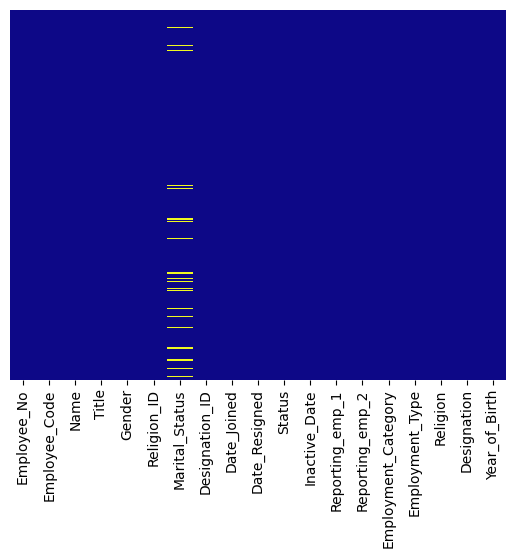

In [864]:
sns.heatmap(data=employee.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [865]:
employee.isna().sum()

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         64
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64

In [866]:
salary = pd.read_csv('data/train-salary.csv')

In [867]:
# Separate the dataset based on missing values in 'Marital_Status'
nan_df = employee[employee['Marital_Status'].isnull()]
comp_df = employee[employee['Marital_Status'].notnull()]

In [868]:
yob = employee['Year_of_Birth'].unique().tolist()
for i in yob:
    print(i)

1965
1973
1974
1980
1962
1969
1981
1967
1976
1986
1975
1984
1963
1990
1961
1982
1991
1978
1994
1989
1960
1993
1988
1972
1995
1992
1987
'0000'
1997
1985
1947
1966
1955
1959
1957
1958
1970
2001
1996
1998
1983
1999
1971
1946
1952
1968
1954
1964
2000
1951
2003
1949
1979
1977
1956
1953
2005
2002
1950
2006


In [869]:
employee.loc[employee['Year_of_Birth'] == "'0000'"]
employee.loc[employee['Year_of_Birth'] == "'0000'", 'Year_of_Birth'] = '0'

In [870]:
employee['Date_Joined'] = pd.to_datetime(employee['Date_Joined'])

In [871]:
# drop rows where 'Year_of_Birth' == '0'

In [872]:
# employee['Year_of_Birth'] = pd.to_datetime(employee['Year_of_Birth'])
# employee['Date_Joined'] = pd.to_datetime(employee['Date_Joined'])

# # Calculate age at the time of joining
# employee['Age_at_Join'] = employee['Date_Joined'].dt.year - employee['Year_of_Birth'].dt.year

In [873]:
# employee['Date_Resigned'] = pd.to_datetime(employee['Date_Resigned'], errors='coerce')
# # employee['Age_at_desig'] = employee['Date_Resigned'].dt.year - employee['Year_of_Birth'].dt.year
# # employee['Age_at_Join']

In [874]:
num_nat_values = employee['Date_Resigned'].isna().sum()
num_nat_values

0

In [875]:
# employee.loc[employee['Age_at_Join'] == 18] 

In [876]:
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [877]:
(employee['Date_Resigned'].unique().tolist())

['\\N',
 '6/28/2021',
 '1/31/2022',
 '0000-00-00',
 '5/5/2021',
 '5/23/2021',
 '4/30/2021',
 '12/17/2021',
 '8/31/2021',
 '5/30/2021',
 '7/25/2021',
 '3/25/2021',
 '5/31/2021',
 '8/31/2022',
 '10/26/2021',
 '9/27/2022',
 '6/30/2021',
 '12/22/2021',
 '8/20/2021',
 '12/10/2020',
 '4/9/2021',
 '2/19/2022',
 '5/31/2022',
 '2/28/2022',
 '11/28/2020',
 '11/27/2021',
 '5/4/2022',
 '10/31/2021',
 '3/2/2021',
 '2/10/2022',
 '1/18/2021',
 '11/30/2020',
 '1/12/2022',
 '12/31/2022',
 '7/20/2022',
 '12/5/2020',
 '9/18/2021',
 '9/20/2021',
 '2/28/2021',
 '11/26/2021',
 '7/30/2021',
 '5/3/2021',
 '3/14/2021',
 '9/12/2022',
 '4/30/2022',
 '7/31/2021',
 '2/26/2022',
 '11/30/2021',
 '2/12/2021',
 '10/25/2021',
 '10/10/2022',
 '5/14/2022',
 '1/23/2022',
 '9/7/2021',
 '10/21/2021',
 '8/8/2021',
 '12/28/2020',
 '12/31/2020',
 '1/16/2021',
 '11/25/2020',
 '4/7/2022',
 '11/22/2020',
 '3/30/2021',
 '2/24/2022',
 '11/24/2020',
 '6/30/2022',
 '10/18/2021',
 '12/12/2020',
 '12/19/2020',
 '5/10/2021',
 '3/22/2021

In [878]:
temp_res = employee.loc[(employee['Date_Resigned'] != '\\N') & (employee['Status'] == 'Active')]
temp_res['Date_Resigned'].unique().tolist()

['0000-00-00']

In [879]:
# employee.loc[(employee['Date_Resigned'] != '0000-00-00') or (employee['Date_Resigned'] != '\\N'), 'Status'] = 'Inactive'
employee.loc[(employee['Date_Resigned'] != '0000-00-00') | (employee['Date_Resigned'] != '\\N'), 'Status'] = 'Inactive'

In [880]:
employee['Year_of_Birth'] = employee['Year_of_Birth'].astype(int)

In [881]:
employee['Year_of_Birth'].describe()

count     997.000000
mean     1778.325978
std       604.048503
min         0.000000
25%      1968.000000
50%      1984.000000
75%      1993.000000
max      2006.000000
Name: Year_of_Birth, dtype: float64

In [882]:
# employee['Year_of_Birth'] = employee['Year_of_Birth'].astype(int)

In [883]:
# Label Encode the 'Status' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
employee['Status_temp'] = le.fit_transform(employee['Status'])
employee


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Inactive,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Inactive,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Inactive,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Inactive,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Inactive,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Inactive,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0


In [884]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
employee['Gender_temp'] = le.fit_transform(employee['Gender'])
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,...,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,...,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,...,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,...,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,...,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,...,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,...,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,...,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1


In [885]:
employee['Title_temp'] = le.fit_transform(employee['Title'])
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1,0
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [886]:
# employee.drop(columns=['Marital_Status_temp'], inplace=True)

In [887]:
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1,0
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [888]:
# choose predictor features that influence marital status
predictors = ['Year_of_Birth','Status_temp','Designation_ID','Religion_ID','Gender_temp','Title_temp']

# choose the target
target = 'Marital_Status'

In [889]:
employee[predictors].isna().sum()

Year_of_Birth     0
Status_temp       0
Designation_ID    0
Religion_ID       0
Gender_temp       0
Title_temp        0
dtype: int64

In [890]:
employee[target].isna().sum()

64

In [891]:
employee[employee['Year_of_Birth']=='0']

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp


In [892]:
for i in predictors:
    print(i,employee[i].dtype)

Year_of_Birth int32
Status_temp int32
Designation_ID int64
Religion_ID int64
Gender_temp int32
Title_temp int32


In [893]:
# handle out of range values in 'Year_of_Birth'
employee['Year_of_Birth'].describe()

count     997.000000
mean     1778.325978
std       604.048503
min         0.000000
25%      1968.000000
50%      1984.000000
75%      1993.000000
max      2006.000000
Name: Year_of_Birth, dtype: float64

In [894]:
# from sklearn.ensemble import RandomForestClassifier

# # Train a random forest classifier
# clf = RandomForestClassifier()
# clf.fit(employee[predictors], employee[target])

ValueError: Input contains NaN

In [895]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [896]:
categorical_features = ['Marital_Status'] 

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming the data is in a DataFrame called "employee"
# # and you want to create a dictionary for the "Marital_Status" column

# # Select the column for label encoding
# column_name = 'Marital_Status'

# # Create a copy of the original DataFrame to avoid modifying the original data
# employee_copy = employee.copy()

# # Select the column for encoding
# column_data = employee_copy[column_name]

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Fit the label encoder on the non-null data
# label_encoder.fit(column_data.dropna())

# # Get the unique labels and their corresponding encoded values
# labels = label_encoder.classes_
# encoded_values = label_encoder.transform(labels)

# # Create a dictionary mapping categorical values to encoded values
# category_mapping = dict(zip(labels, encoded_values))

# # Print the dictionary
# print(category_mapping)


{'Married': 0, 'Single': 1}


In [897]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the data is in a DataFrame called "employee"
# and you want to label encode the "Marital_Status" column

# Select the column for label encoding
column_name = 'Marital_Status'

# Create a copy of the original DataFrame to avoid modifying the original data
employee_copy = employee.copy()

# Select the column for encoding
column_data = employee_copy[column_name]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Preserve NaN values by replacing them with a unique value (e.g., -1)
column_data_filled = column_data.fillna('NaN')

# Fit the label encoder on the non-null data
label_encoder.fit(column_data_filled)

# Get the unique labels and their corresponding encoded values
labels = label_encoder.classes_
encoded_values = label_encoder.transform(labels)

# Encode the column data, preserving NaN values
encoded_data = column_data_filled.replace('NaN', float('nan')).map(lambda x: label_encoder.transform([x])[0] if pd.notnull(x) else x)

# Replace the original column with the encoded data
employee_copy[column_name] = encoded_data

# Print the updated DataFrame
(employee_copy)


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,0.0,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,0.0,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,0.0,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,0.0,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1,0
4,352,88,Maximillian Hand,Mr,Male,1,0.0,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,2.0,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,2.0,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,2.0,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,2.0,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [898]:
employee_copy["Marital_Status"].unique().tolist()

[0.0, 2.0, nan]

In [ ]:
employee

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,1,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,Married,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,1,1,0
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,1,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [899]:
val_dict = {employee_copy.loc[employee_copy['Employee_No'] == 347, 'Marital_Status'].values[0] : 'Married',
            employee_copy.loc[employee_copy['Employee_No'] == 2836, 'Marital_Status'].values[0] : 'Single'
            }

val_dict

{0.0: 'Married', 2.0: 'Single'}

In [ ]:
employee_copy 

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,0.0,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,0.0,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,0.0,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,1,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,0.0,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,1,1,0
4,352,88,Maximillian Hand,Mr,Male,1,0.0,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,2.0,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,1,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,2.0,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,2.0,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,2.0,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [ ]:
predictors

['Year_of_Birth',
 'Status_temp',
 'Designation_ID',
 'Religion_ID',
 'Gender_temp',
 'Title_temp']

In [ ]:
target

'Marital_Status'

In [ ]:
employee_copy['Religion_ID'].unique().tolist()

[1, 4, 3, 5]

In [901]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming the data is in a DataFrame called "employee"
# and the columns for imputation and target exist

# Select the columns used for imputation
imputation_columns = ['Year_of_Birth', 'Status_temp', 'Designation_ID', 'Religion_ID', 'Gender_temp', 'Title_temp']


In [903]:
employee_copy_copy = employee_copy.copy()

In [904]:
#Select the columns for imputation and target
data = employee_copy[imputation_columns + ['Marital_Status']]

# Create an instance of KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer on the data to compute the imputation values
imputed_data = imputer.fit_transform(data)

# Create a new DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=data.columns)

# Replace the original 'Marital_Status' column with the imputed values
employee_copy['Marital_Status'] = imputed_df['Marital_Status']


In [905]:
employee_copy

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,0.0,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,0.0,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,0.0,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,0.0,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1,0
4,352,88,Maximillian Hand,Mr,Male,1,0.0,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,2.0,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,2.0,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,2.0,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,2.0,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [906]:
employee_copy['Marital_Status'].unique().tolist()

[0.0, 2.0, 1.0]

In [921]:
employee_copy = employee_copy_copy.copy()

In [922]:
# Select the columns used for imputation
imputation_features = ['Year_of_Birth', 'Status_temp', 'Designation_ID', 'Religion_ID', 'Gender_temp', 'Title_temp']


# Select the columns for imputation and the target feature
data = employee_copy[imputation_features + ['Marital_Status']]

# Identify the index of the feature to be imputed
feature_to_impute = 'Marital_Status'
imputation_index = data.columns.get_loc(feature_to_impute)

# Create an instance of KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=1)

# Fit the imputer on the data to compute the imputation values
imputed_data = imputer.fit_transform(data)

# Update the imputed values in the DataFrame
employee_copy[feature_to_impute] = imputed_data[:, imputation_index]
employee_copy

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Status_temp,Gender_temp,Title_temp
0,347,6,Myrl Bechtelar MD,Mr,Male,1,0.0,24,1993-12-08,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1965,0,1,0
1,348,33,Francis Mraz,Mr,Male,1,0.0,24,1995-03-14,\N,...,\N,\N,Staff,Permanant,Buddhist,Driver,1973,0,1,0
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,0.0,23,1988-01-27,6/28/2021,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,0,1,0
3,351,77,Mr Nelson Braun PhD,Mr,Male,4,0.0,40,1999-10-01,1/31/2022,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,0,1,0
4,352,88,Maximillian Hand,Mr,Male,1,0.0,7,2001-01-26,\N,...,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,2.0,17,2022-11-01,12/22/2022,...,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,0,0,2
993,2890,5479,Delphia Haley,Mr,Male,1,2.0,8,2022-11-21,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0,1,0
994,2972,5480,Lance Stanton,Mr,Male,1,2.0,201,2022-12-05,\N,...,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,0,1,0
995,2973,5481,Chauncey Reilly,Mr,Male,1,2.0,8,2022-12-08,0000-00-00,...,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0,1,0


In [923]:
employee_copy['Marital_Status'].unique().tolist()

[0.0, 2.0]

In [924]:
employee_copy.isna().sum()

Employee_No            0
Employee_Code          0
Name                   0
Title                  0
Gender                 0
Religion_ID            0
Marital_Status         0
Designation_ID         0
Date_Joined            0
Date_Resigned          0
Status                 0
Inactive_Date          0
Reporting_emp_1        0
Reporting_emp_2        0
Employment_Category    0
Employment_Type        0
Religion               0
Designation            0
Year_of_Birth          0
Status_temp            0
Gender_temp            0
Title_temp             0
dtype: int64